<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/chap20_Regression_ML_Case_Study_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition
For this project we will investigate the Boston House Price dataset. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows:

1. CRIM: per capita crime rate by town

2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS: proportion of non-retail business acres per town

4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000

11. PTRATIO: pupil-teacher ratio by town 

12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s


In [0]:
# Load libraries 
import numpy as np
from numpy import arange 
from matplotlib import pyplot as plt
from pandas import read_csv 
from pandas import set_option 
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error

In [0]:
# Load dataset 
filename = 'housing.csv' 
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 
dataset = read_csv(filename, delim_whitespace=True, names=names)

In [3]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [4]:
dataset.shape

(506, 14)

In [5]:
dataset.describe()

CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

In [6]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

Let’s summarize the distribution of each attribute

In [8]:
# descriptions 
set_option('precision', 1)
dataset.head()

CRIM    ZN  INDUS  CHAS  NOX  ...    TAX  PTRATIO      B  LSTAT  MEDV
0  6.3e-03  18.0    2.3     0  0.5  ...  296.0     15.3  396.9    5.0  24.0
1  2.7e-02   0.0    7.1     0  0.5  ...  242.0     17.8  396.9    9.1  21.6
2  2.7e-02   0.0    7.1     0  0.5  ...  242.0     17.8  392.8    4.0  34.7
3  3.2e-02   0.0    2.2     0  0.5  ...  222.0     18.7  394.6    2.9  33.4
4  6.9e-02   0.0    2.2     0  0.5  ...  222.0     18.7  396.9    5.3  36.2

[5 rows x 14 columns]

In [9]:
# correlation 
set_option('precision', 2)
dataset.corr(method='pearson')

CRIM    ZN  INDUS      CHAS   NOX  ...   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42  ...  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  ... -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76  ...  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  ... -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00  ...  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  ... -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73  ...  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  ... -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61  ...  0.91     0.46 -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -3.56e-02  0.67  ...  1.00     0.46 -0.44   0.54 -0.47
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19  ...  0.46     1.00 -0.18   0.37 -0.51
B       -0.39  0.18  -0.36  4.88e-02 -0.38  ... -0.44    -0.18  1.00  -0.37  0.33
LSTAT    0.46 -0.41   0.60 -5.39e-02  0.59  ...  0.54     0.37 -0.37   1.00 -0.74
MEDV    -0.39  0.36  -0.48  1.75e-01 -0.43  ... -0.47    -0.51  0.33  -0.74  1.00

[14 rows x 14 columns]

We can see that many of the attributes have a strong correlation (e.g. > 0.70 or < −0.70).

 NOX and INDUS with 0.77.

 DIS and INDUS with -0.71.

 TAX and INDUS with 0.72.

 AGE and NOX with 0.73.

 DIS and NOX with -0.78.

 LSTAT and MEDV with -0.74
 


# Data Visualization

Unimodal

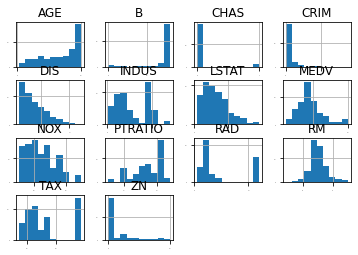

In [10]:
# histograms 
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1) 
plt.show()

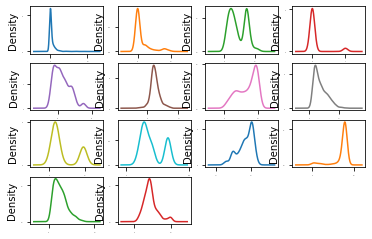

In [11]:
# density 
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1) 
plt.show()

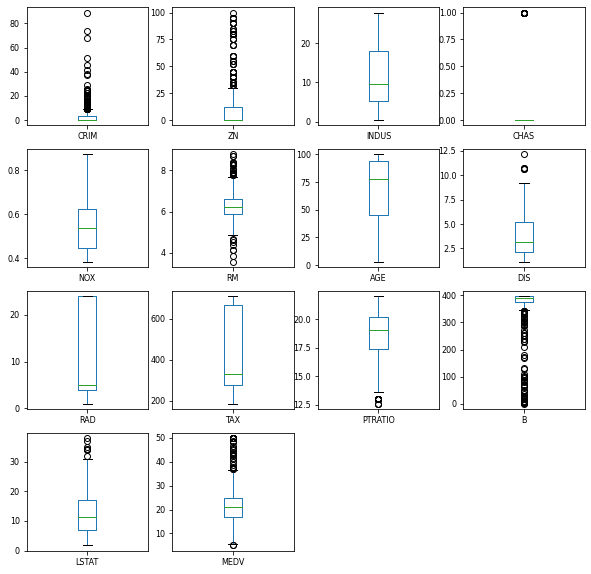

In [17]:
# box and whisker plots 
dataset.plot(kind='box', subplots=True, figsize=(10,10), layout=(4,4), sharex=False, sharey=False, fontsize=8) 
plt.show()

Multimodal Data Visualizations

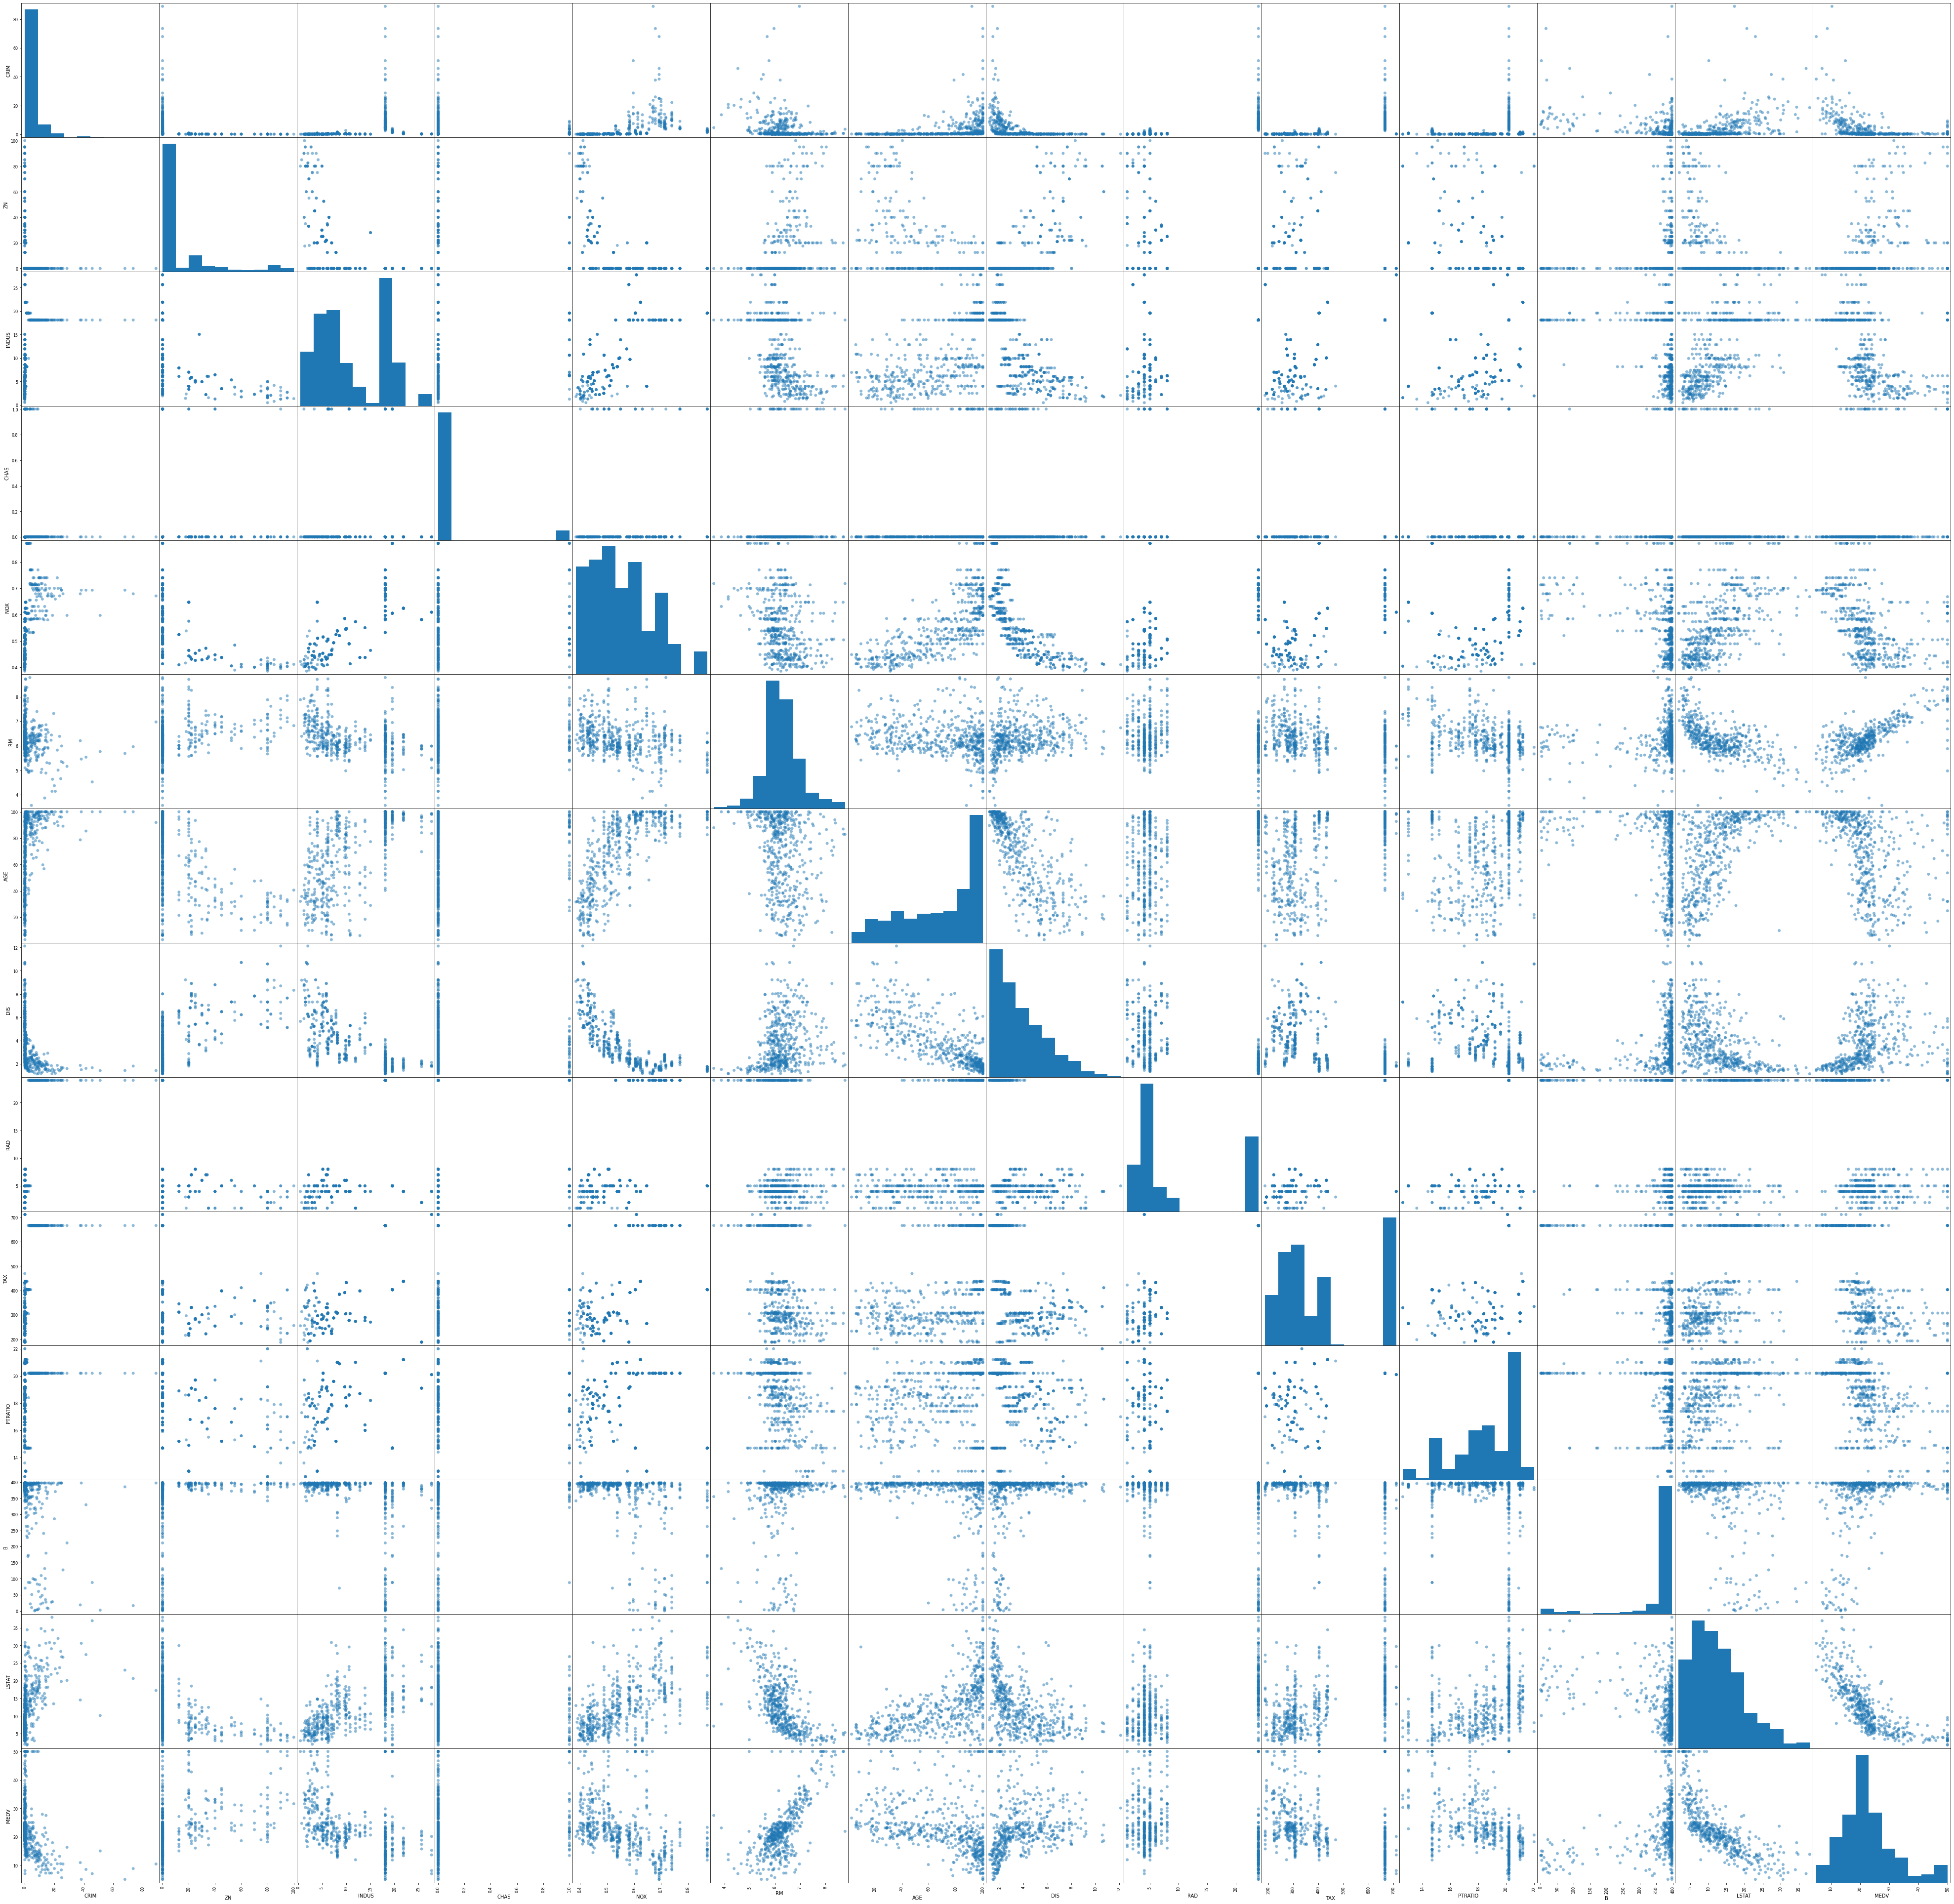

In [18]:
# scatter plot matrix 
scatter_matrix(dataset, figsize=(70,70), marker='@') 
plt.show()

We can see that some of the higher correlated attributes do show good structure in their relationship. Not linear, but nice predictable curved relationships

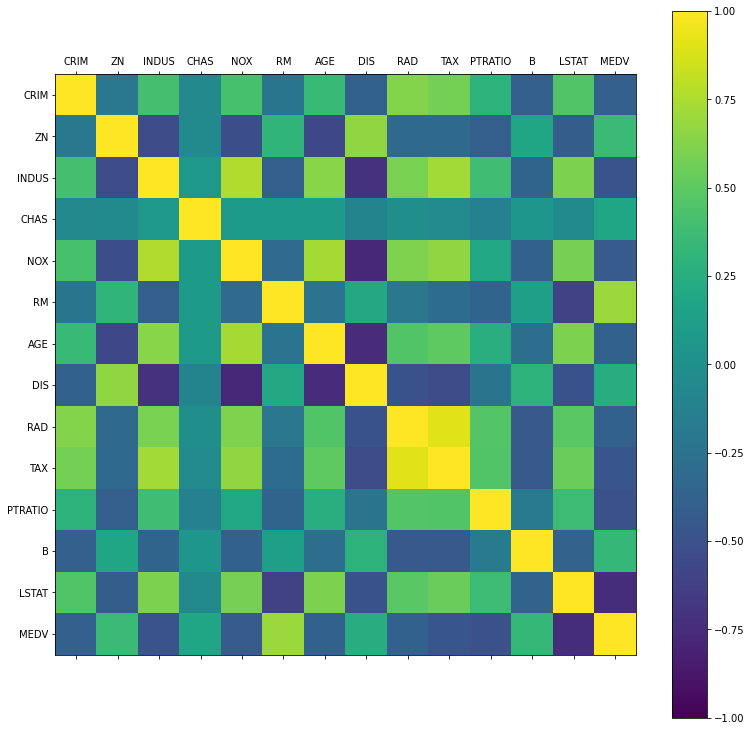

In [23]:
# correlation matrix 
fig = plt.figure(figsize=(13,13)) 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
ticks = np.arange(0,14,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(names) 
ax.set_yticklabels(names) 
plt.show()

Summary of Ideas
There is a lot of structure in this dataset. We need to think about transforms that we could use later to better expose the structure which in turn may improve modeling accuracy. So far it would be worth trying:

. Feature selection and removing the most correlated attributes.

. Normalizing the dataset to reduce the eﬀect of diﬀering scales.

. Standardizing the dataset to reduce the eﬀects of diﬀering distributions.

With lots of additional time I would also explore the possibility of binning (discretization) of the data. This can often improve accuracy for decision tree algorithms.


Validation Dataset

In [0]:
# Split-out validation dataset 
array = dataset.values 
X = array[:,0:13] 
Y = array[:,13] 
validation_size = 0.20 
seed = 7 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Evaluate Algorithms: Baseline

In [0]:
# Test options and evaluation metric 
num_folds = 10 
seed = 7 
scoring = 'neg_mean_squared_error'

. Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).

. Nonlinear Algorithms: Classiﬁcation and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [0]:
# Spot-Check Algorithms 
models = [] 
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso(max_iter=200))) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

In [30]:
# evaluate each model in turn 
results = [] 
names = [] 
msg = []
for name, model in models: 
  kfold = KFold(n_splits=num_folds) 
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
  results.append(cv_results) 
  names.append(name) 
  msg.append([name, cv_results.mean(), cv_results.std()]) 
msg

[['LR', -21.37985572667869, 9.414263656984865],
 ['LASSO', -26.42356110840965, 11.651109915777914],
 ['EN', -27.502259350661717, 12.305022264112704],
 ['KNN', -41.89648839024391, 13.901688149849864],
 ['CART', -24.32084695121951, 11.931108010811744],
 ['SVR', -67.8278859731828, 29.049137595262604]]